In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from PIL import Image
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import time

##### Importing and inspecting the data

In [9]:
df = pd.read_csv('data/clean_data.csv').iloc[:,1:]

In [10]:
print(df.shape)
df.head()

(29932, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,0,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29932 entries, 0 to 29931
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         29932 non-null  int64
 1   LIMIT_BAL  29932 non-null  int64
 2   SEX        29932 non-null  int64
 3   EDUCATION  29932 non-null  int64
 4   MARRIAGE   29932 non-null  int64
 5   AGE        29932 non-null  int64
 6   PAY_1      29932 non-null  int64
 7   PAY_2      29932 non-null  int64
 8   PAY_3      29932 non-null  int64
 9   PAY_4      29932 non-null  int64
 10  PAY_5      29932 non-null  int64
 11  PAY_6      29932 non-null  int64
 12  BILL_AMT1  29932 non-null  int64
 13  BILL_AMT2  29932 non-null  int64
 14  BILL_AMT3  29932 non-null  int64
 15  BILL_AMT4  29932 non-null  int64
 16  BILL_AMT5  29932 non-null  int64
 17  BILL_AMT6  29932 non-null  int64
 18  PAY_AMT1   29932 non-null  int64
 19  PAY_AMT2   29932 non-null  int64
 20  PAY_AMT3   29932 non-null  int64
 21  PAY_AMT4   2

## EDA

##### Categorical and continuous variable split

In [12]:
def cats_and_conts(df):
    conts = []
    cats = []
    for col in df.columns:
        if (df[col].nunique() < 20) & (df[col].nunique() > 2):
            cats.append(col)
        elif df[col].nunique() >= 20:
            conts.append(col)
    return df[cats], df[conts]

#### Countplots for SEX and PAY_i

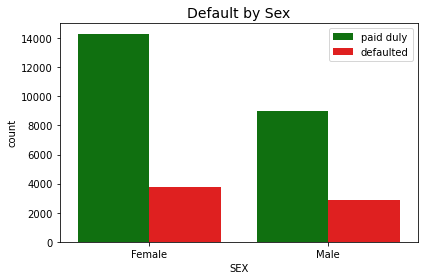

In [13]:
sns.countplot(x='SEX', data=df, hue='DEFAULT', palette= ['g','r'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.legend(labels=['paid duly','defaulted']);
plt.title('Default by Sex',fontsize=14)
plt.savefig('images/Countplot.png')
plt.tight_layout()

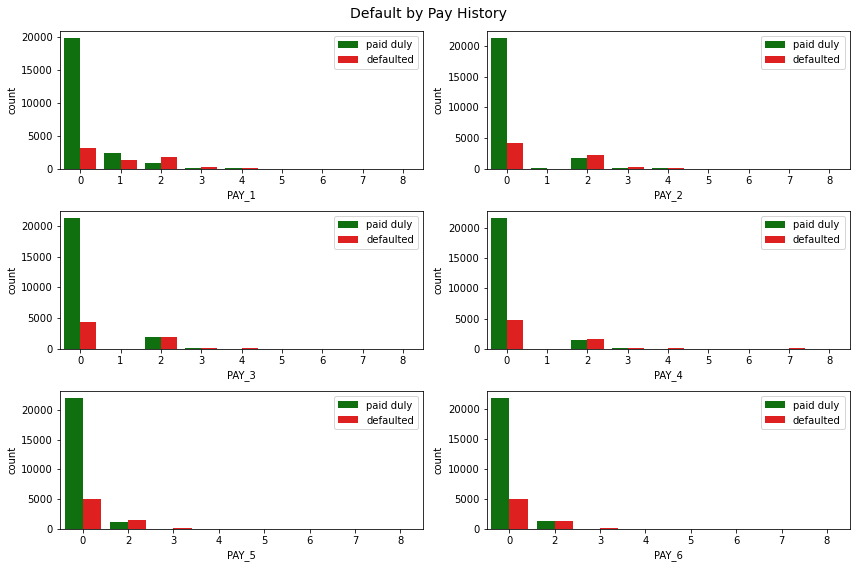

In [14]:
fig = plt.figure(figsize=(12,8))
for i in range(1,7):
    ax = fig.add_subplot(int(f'32{i}'))
    sns.countplot(x=f'PAY_{i}', data=df, hue='DEFAULT', palette= ['g','r'])
    ax.legend(labels=['paid duly','defaulted'], loc =1);
fig.suptitle('Default by Pay History',fontsize=14)
fig.tight_layout()
plt.savefig('images/Countplots2.png')

#### Heatmap

In [15]:
def viz_heatmap(df, figsize = (12,10), save=False):
    sns.axes_style("white")
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',
                         linewidths=.5, annot=True, vmin = -1, vmax=1, cbar_kws = {"shrink": .75})
    # Create a Rectangle patch
    rect = patches.Rectangle((0, len(df.columns)-1.01), len(df.columns)-1, .9,
                                 linewidth=1.25, edgecolor='#03C04A', facecolor='None')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.title("Feature Correlations", fontfamily = 'serif')
    plt.xticks(rotation = 60)
    if save:
        plt.savefig(f'images/{save}.png')
    plt.show();

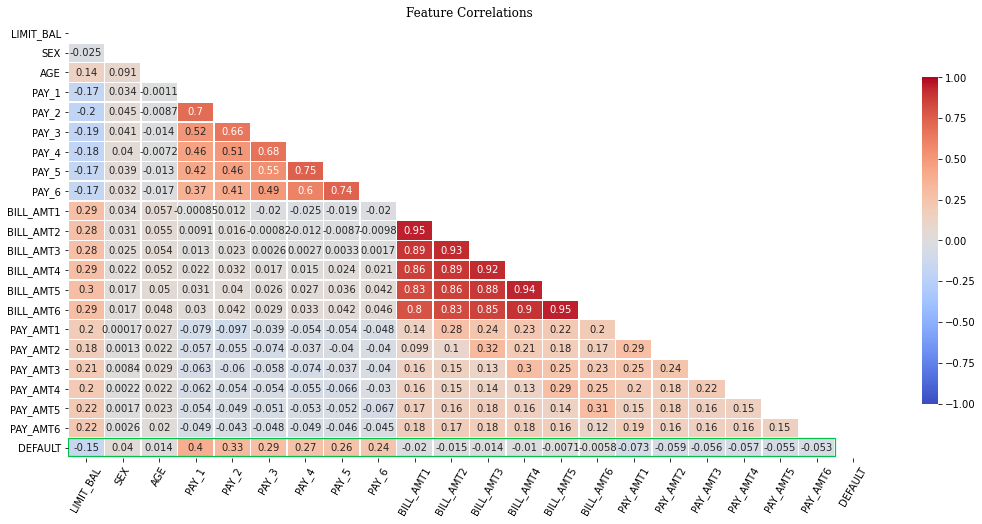

In [16]:
viz_heatmap(df[list(df.columns[1:3]) + list(df.columns[5:])], (18,8), save='heatmap')

Multicollinearity will need to be addressed for models such as logistic regression

#### Boxplots

In [17]:
def boxplot_variation(df, feature1, feature2, feature3=None, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)

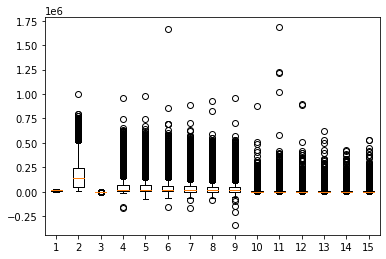

In [18]:
plt.boxplot([df[col] for col in cats_and_conts(df)[1].columns]);

In [19]:
cats_and_conts(df)[1].columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

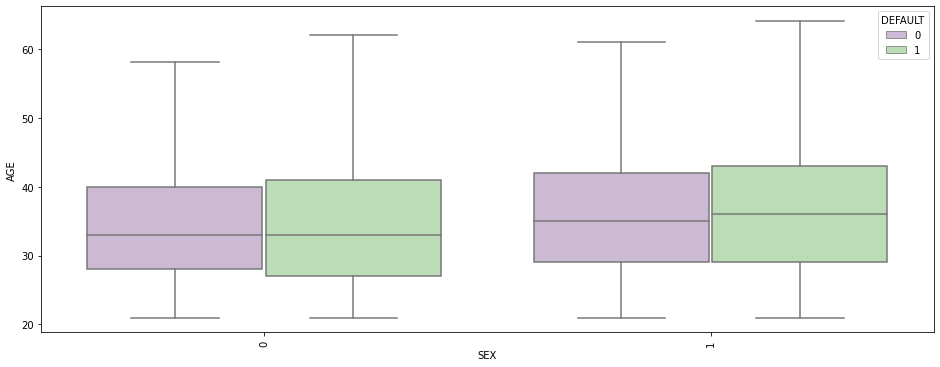

In [20]:
boxplot_variation(df, 'SEX', 'AGE', 'DEFAULT', width=16)

## Modeling

- For our models, we want to optimize recall score. However, we can easily achieve a recall score of one with any model that heavily predicts positive (defaulters). Thus, we will use AUC 

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV #, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost # for xgboost.plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

### Functions to implement before fitting models

##### One-Hot Encode

In [29]:
def one_hot_encode(X, no_multicol=False):
    return pd.get_dummies(X, columns = cats_and_conts(X)[0].columns, drop_first=no_multicol)

##### Train-test split

In [30]:
def tr_te_spl(stratify):
    return train_test_split(X, y, test_size=0.25, stratify=stratify, random_state=1)

##### Class imbalance: Over-sampling using SMOTE
- Only over sample the training data

In [31]:
from imblearn.over_sampling import SMOTE
def SMOTE_os(X_train, y_train, verbose=False):
    over_samp = SMOTE(random_state=1)
    os_X,os_y = over_samp.fit_resample(X_train, y_train)
    os_X = pd.DataFrame(data=os_X,columns=X_train.columns)
    os_y = pd.DataFrame(data=os_y,columns=['DEFAULT'])
    # we can Check the numbers of our data
    if verbose == True:
        print('length of oversampled data is ',len(os_X))
        print('Number of non-defaulters in oversampled data',len(os_y[os_y['DEFAULT']==0]))
        print('Number of defaulters',len(os_y[os_y['DEFAULT']==1]))
        print('Proportion of non-defaulter data in oversampled data is ',len(os_y[os_y['DEFAULT']==0])/len(os_X))
        print('Proportion of defaulter data in oversampled data is ',len(os_y[os_y['DEFAULT']==1])/len(os_X))
    return os_X, os_y.squeeze()

##### Downsample

In [32]:
def downsample(df, n_samples=10000):
    df_no_default = df[df['DEFAULT'] == 0]
    df_default = df[df['DEFAULT'] == 1]
    df_no_def_resamp = resample(df_no_default, replace=True,n_samples=n_samples,random_state=1)
    df_def_resamp = resample(df_default, replace=True,n_samples=n_samples,random_state=1)
    return pd.concat([df_no_def_resamp,df_def_resamp])

##### Print evaluation metrics

In [33]:
def print_eval_metrics(X_train, X_test, y_train, y_test, clf, roc_auc=False):
    y_pred = clf.predict(X_test)
    print(clf)
    print('Train accuracy: ', accuracy_score(y_train, clf.predict(X_train)) * 100)
    print('Test accuracy: ', accuracy_score(y_test, y_pred) * 100)
    print("Precision Score: {}".format(precision_score(y_test, y_pred)))
    print("Recall Score: {}".format(recall_score(y_test, y_pred)))
    print('F1 Score: ', f1_score(y_test, y_pred))
    if roc_auc:
        y_score = clf.fit(X_train, y_train).decision_function(X_test)
        print('ROC AUC Score: ', roc_auc_score(y_test, y_score))
    print(classification_report(y_test, y_pred, target_names=['NO DEFAULT', 'DEFAULT']))

#### Independent and Dependent Variables

In [34]:
X = df.iloc[:,1:24].copy()
# display(X.head())
y = df.iloc[:,-1:].copy().squeeze() # series
# display(y.head())

#### Train-test split and one hot encode

In [35]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encode(X), y, test_size=0.25, random_state=1)

#### KNN
- affected by class imbalance
- must normalize data
- KNN does better with smaller datasets. We will still check oversampled data (using SMOTE), but we should expect to get better results by down sampling and/or reducing features
- Suffers from Curse of Dimensionality, So we'd like to use dimensionality reduction, like PCA or LDA, but for now we will just hand select the features most correlated with the target variable, DEFAULT

##### Balance classes using SMOTE

In [36]:
os_X, os_y = SMOTE_os(X_train, y_train, verbose=True)

length of oversampled data is  34916
Number of non-defaulters in oversampled data 17458
Number of defaulters 17458
Proportion of non-defaulter data in oversampled data is  0.5
Proportion of defaulter data in oversampled data is  0.5


##### Normalize data

In [37]:
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(os_X)
X_test_knn = scaler_knn.transform(X_test)

##### Baseline Model

In [38]:
# 2m
clf_knn = KNeighborsClassifier() # n_neighbors 5 by default
clf_knn.fit(X_train_knn, os_y)
print_eval_metrics(X_train_knn, X_test_knn, os_y, y_test, clf_knn)

KNeighborsClassifier()
Train accuracy:  89.1396494443808
Test accuracy:  77.99011091808097
Precision Score: 0.4973384030418251
Recall Score: 0.39878048780487807
F1 Score:  0.44263959390862945
              precision    recall  f1-score   support

  NO DEFAULT       0.84      0.89      0.86      5843
     DEFAULT       0.50      0.40      0.44      1640

    accuracy                           0.78      7483
   macro avg       0.67      0.64      0.65      7483
weighted avg       0.77      0.78      0.77      7483



##### GridSearchCV to find optimal model

In [39]:
# 6m
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [5]},
                        scoring='recall', cv=4, verbose=0) 
gs_knn.fit(X_train_knn, os_y)
print(gs_knn.best_score_)
print(gs_knn.best_params_)
# print(gs_knn.cv_results_)

# roc_auc_score
# first run (3-7): {'n_neighbors': 7}, .8989
# second run (8-12): {'n_neighbors': 12} .9038
# third run (13-17): {'n_neighbors': 15} .9048
# fourth run (18-21): {'n_neighbors': 20} .9051
# fifth run (22-27): {'n_neighbors': 22} .9047, 

0.7553788914402226
{'n_neighbors': 5}


##### Optimal model

In [40]:
# 2.5m
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_knn, os_y)
print_eval_metrics(X_train_knn, X_test_knn, os_y, y_test, clf_knn)

KNeighborsClassifier()
Train accuracy:  89.1396494443808
Test accuracy:  77.99011091808097
Precision Score: 0.4973384030418251
Recall Score: 0.39878048780487807
F1 Score:  0.44263959390862945
              precision    recall  f1-score   support

  NO DEFAULT       0.84      0.89      0.86      5843
     DEFAULT       0.50      0.40      0.44      1640

    accuracy                           0.78      7483
   macro avg       0.67      0.64      0.65      7483
weighted avg       0.77      0.78      0.77      7483



##### Downsample 
- like SMOTE, this allows for class balance

In [41]:
df_downsamp = downsample(df)

##### Downsample split and one-hot encode

In [42]:
ds_X = df_downsamp.drop('DEFAULT', axis=1).copy()
ds_y = df_downsamp['DEFAULT'].copy()
ds_X_train, ds_X_test, ds_y_train, ds_y_test = train_test_split(one_hot_encode(ds_X), ds_y,
                                                                test_size=0.25, random_state=1)

In [43]:
scaler_knn2 = StandardScaler()
X_train_knn = scaler_knn2.fit_transform(ds_X_train)
X_test_knn = scaler_knn2.transform(ds_X_test)

In [44]:
# 1m
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': list(range(3,30))},
                        scoring='recall', cv=4, verbose=0) 
gs_knn.fit(ds_X_train, ds_y_train)
print(gs_knn.best_score_)
print(gs_knn.best_params_)
# print(gs_knn.cv_results_)

0.694410683512976
{'n_neighbors': 29}


In [45]:
clf_knn2 = KNeighborsClassifier(n_neighbors=29)
clf_knn2.fit(ds_X_train, ds_y_train)
print_eval_metrics(ds_X_train, ds_X_test, ds_y_train, ds_y_test, clf_knn2)

KNeighborsClassifier(n_neighbors=29)
Train accuracy:  65.71333333333334
Test accuracy:  61.339999999999996
Precision Score: 0.5862785862785863
Recall Score: 0.6960098724804608
F1 Score:  0.6364491254466805
              precision    recall  f1-score   support

  NO DEFAULT       0.65      0.54      0.59      2569
     DEFAULT       0.59      0.70      0.64      2431

    accuracy                           0.61      5000
   macro avg       0.62      0.62      0.61      5000
weighted avg       0.62      0.61      0.61      5000



##### Downsample with feature reduction

In [46]:
ds_X = df_downsamp[['PAY_1','PAY_2','PAY_3']].copy()
ds_y = df_downsamp['DEFAULT'].copy()
ds_X_train, ds_X_test, ds_y_train, ds_y_test = train_test_split(one_hot_encode(ds_X), ds_y,
                                                                test_size=0.25, random_state=1)

In [47]:
scaler_knn3 = StandardScaler()
X_train_knn = scaler_knn3.fit_transform(ds_X_train)
X_test_knn = scaler_knn3.transform(ds_X_test)

In [48]:
gs_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': list(range(3,20))},
                        scoring='recall', cv=4, verbose=0) 
gs_knn.fit(ds_X_train, ds_y_train)
print(gs_knn.best_score_)
print(gs_knn.best_params_)
# print(gs_knn.cv_results_)

0.56228968638212
{'n_neighbors': 19}


In [49]:
clf_knn3 = KNeighborsClassifier(n_neighbors=19)
clf_knn3.fit(ds_X_train, ds_y_train)
print_eval_metrics(ds_X_train, ds_X_test, ds_y_train, ds_y_test, clf_knn3)

KNeighborsClassifier(n_neighbors=19)
Train accuracy:  69.61333333333334
Test accuracy:  70.02000000000001
Precision Score: 0.7898009950248757
Recall Score: 0.5224187577128754
F1 Score:  0.6288685318148057
              precision    recall  f1-score   support

  NO DEFAULT       0.66      0.87      0.75      2569
     DEFAULT       0.79      0.52      0.63      2431

    accuracy                           0.70      5000
   macro avg       0.72      0.70      0.69      5000
weighted avg       0.72      0.70      0.69      5000



In [50]:
def knnClassify(X_train, y_train):
    knn_pipe = make_pipeline(StandardScaler(),  KNeighborsClassifier())
    
    knn_param_grid = [{'n_neighbors': [3, 4, 5, 6, 7]}]

    gs_knn = GridSearchCV(estimator=knn_pipe,
                param_grid=knn_param_grid,
                scoring='accuracy',
                refit=True,
                cv=5, verbose=0)
    
    gs_knn.fit(X_train, y_train)

    return gs_knn

#### Decision Tree
- Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
- Decision trees and ensemble methods don't perform well on imbalanced classes.

##### Balance classes using SMOTE

In [51]:
os_X, os_y = SMOTE_os(X_train, y_train, verbose=True)

length of oversampled data is  34916
Number of non-defaulters in oversampled data 17458
Number of defaulters 17458
Proportion of non-defaulter data in oversampled data is  0.5
Proportion of defaulter data in oversampled data is  0.5


##### Baseline Model

In [52]:
clf_dt = DecisionTreeClassifier(random_state=1) 
clf_dt.fit(os_X, os_y)
print_eval_metrics(os_X, X_test, os_y, y_test, clf_dt)

DecisionTreeClassifier(random_state=1)
Train accuracy:  99.9513117195555
Test accuracy:  71.60229854336497
Precision Score: 0.36505286588759045
Recall Score: 0.4
F1 Score:  0.3817282513820192
              precision    recall  f1-score   support

  NO DEFAULT       0.83      0.80      0.82      5843
     DEFAULT       0.37      0.40      0.38      1640

    accuracy                           0.72      7483
   macro avg       0.60      0.60      0.60      7483
weighted avg       0.73      0.72      0.72      7483



##### Tune Decision Tree

In [53]:
# 3m
dt_param_grid = {'criterion' : ['gini','entropy'],
                 'max_depth': [3,5,7,9,11],
                 'max_leaf_nodes': [5,10,15,20,25],
                 'min_samples_split': [2,3,5]}

gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=dt_param_grid, cv=4, scoring='recall')
gs_dt.fit(os_X, os_y)
print(gs_dt.best_score_)
print(gs_dt.best_params_)
# print(gs_knn.cv_results_)
# 

0.7329193190563634
{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_split': 2}


##### Feature importance

- according to the optimal decision tree

In [54]:
clf_best = DecisionTreeClassifier(criterion='gini', max_depth=7, max_leaf_nodes=20,
                                  min_samples_split= 2).fit(os_X, os_y)
print_eval_metrics(os_X, X_test, os_y, y_test, clf_best)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)
Train accuracy:  83.40875243441403
Test accuracy:  80.19510891353735
Precision Score: 0.5586924219910847
Recall Score: 0.4585365853658537
F1 Score:  0.5036838580040188
              precision    recall  f1-score   support

  NO DEFAULT       0.86      0.90      0.88      5843
     DEFAULT       0.56      0.46      0.50      1640

    accuracy                           0.80      7483
   macro avg       0.71      0.68      0.69      7483
weighted avg       0.79      0.80      0.79      7483



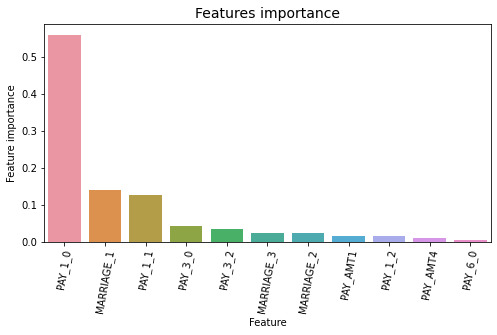

In [55]:
tmp = pd.DataFrame({'Feature': os_X.columns, 'Feature importance': clf_best.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)[:11]
plt.figure(figsize = (8,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=80)
plt.show()  

##### Plot optimal tree and confusion matrix

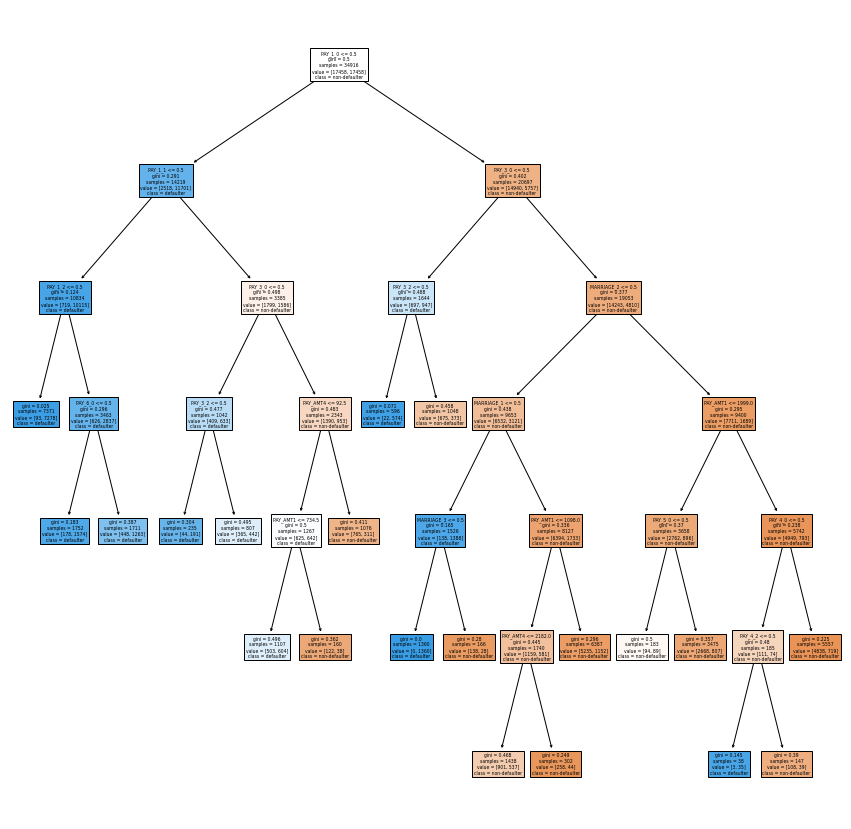

In [56]:
plt.figure(figsize=(15,15))
plot_tree(clf_best, feature_names = os_X.columns,
               class_names=['non-defaulter','defaulter'], filled = True);

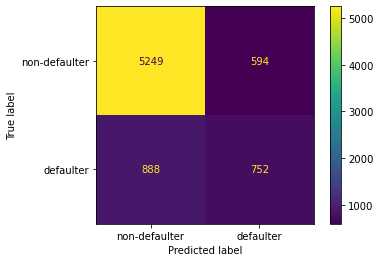

In [57]:
plot_confusion_matrix(clf_best, X_test, y_test, display_labels=['non-defaulter','defaulter']);

In [ ]:
def dtClassify(num_feats):
    dt_pipe = make_pipeline(StandardScaler(), SVC(probability = True))

    dt_param_grid =[{'svc__C':[0.1,1,10],
            'svc__kernel':['poly', 'rbf', 'sigmoid', 'linear'],
            'pca__n_components': np.arange(10,num_feats+1,5)}]

    gs_dt = GridSearchCV(estimator=svm_pipe,
                param_grid=svm_param_grid,
                scoring='accuracy',
                n_jobs = -1,
                refit=True,
                cv=3, verbose=0)

    return gs_dt

#### XGBoost
- Can handle class imbalance, so we will test with an imbalance class and a balanced class (using SMOTE)
- Can handle large datasets, so we won't down sample

##### Stratified train-test split with one-hot encode
stratify to maintain same percentage of classes in both training and testing data, verify with sum / len

In [58]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(one_hot_encode(X), y, test_size=0.25,
                                                    stratify=y, random_state=1)
# print(sum(y_train_xgb) / len(y_train_xgb))
# print(sum(y_test_xgb) / len(y_test_xgb)) # uncomment to verify y is split in a stratified fashion

##### Baseline XGB

In [59]:
clf_xgb = XGBClassifier(objective='binary:logistic', random_state=1)
clf_xgb.fit(X_train_xgb, y_train_xgb, early_stopping_rounds=10,
            eval_metric='aucpr', eval_set=[(X_test_xgb, y_test_xgb)])
print_eval_metrics(X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, clf_xgb)

[0]	validation_0-aucpr:0.51579
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.53780
[2]	validation_0-aucpr:0.54883
[3]	validation_0-aucpr:0.54817
[4]	validation_0-aucpr:0.54811
[5]	validation_0-aucpr:0.54782
[6]	validation_0-aucpr:0.55400
[7]	validation_0-aucpr:0.55851
[8]	validation_0-aucpr:0.55767
[9]	validation_0-aucpr:0.55553
[10]	validation_0-aucpr:0.55488
[11]	validation_0-aucpr:0.55695
[12]	validation_0-aucpr:0.55742
[13]	validation_0-aucpr:0.55621
[14]	validation_0-aucpr:0.55591
[15]	validation_0-aucpr:0.55529
[16]	validation_0-aucpr:0.55233
[17]	validation_0-aucpr:0.55199
Stopping. Best iteration:
[7]	validation_0-aucpr:0.55851

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weigh

##### GridSearchCV to find optimal DT
- XGBoost manual: when there is class imbalance and you only care about overall performance (AUC), use ‘AUC’ for evaluation and use scale_pos_weight

In [60]:
param_grid_xgb1 = {'gamma': [1], # parameter that encourages pruning
                    'learning_rate': [.1], # learning rate, eta
                    'max_depth': [5],
                    'reg_lambda': [10], # regularization parameter, lambda
                    'scale_pos_weight': [7]} # help with class imbalance

# to speed up CV and further prevent overfitting, we can use a random subset of the data (90%)
# and a random subset of the feature columns (50%) per tree.

gs_xgb = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic', subsample=0.9,
                                                colsample_bytree=0.5, random_state=1),
                                                param_grid=param_grid_xgb1,
                                                scoring='roc_auc', verbose=0, n_jobs=10, cv=4)

# first run: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 5}, 
# second run: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 7}, .7828
# 1/.1/5/10/7

In [61]:
# 5 min
gs_xgb.fit(X_train_xgb, y_train_xgb, verbose=False, early_stopping_rounds=10,
           eval_metric='aucpr', eval_set=[(X_test_xgb, y_test_xgb)])
print(gs_xgb.best_score_)
print(gs_xgb.best_params_)

0.780826777359042
{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 7}


##### 

##### Optimal Tree

In [62]:
clf_xgb_opt = XGBClassifier(objective='binary:logistic', gamma=1, learn_rate=.1, max_depth=5,
                            reg_lambda=10, scale_pos_weight=7, subsample=0.9, colsample_bytree=0.5, random_state=1)
clf_xgb_opt.fit(X_train, y_train, verbose=True, early_stopping_rounds=10,
                 eval_metric='aucpr', eval_set=[(X_test, y_test)])
print_eval_metrics(X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, clf_xgb_opt)

[16:19:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.48922
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.52733
[2]	validation_0-aucpr:0.53518
[3]	validation_0-aucpr:0.53924
[4]	validation_0-aucpr:0.54029
[5]	validation_0-aucpr:0.54467
[6]	validation_0-aucpr:0.54937
[7]	validation_0-aucpr:0.55030
[8]	validation_0-aucpr:0.54967
[9]	validation_0-aucpr:0.55407
[10]	validation_0-aucpr:0.55431
[11]	validation_0-aucpr:0.55511
[12]	validation_0-aucpr:0.55752
[13]	validation_0-aucpr:0.55834
[14]	validation_0-aucpr:0.55914
[15]	validation_0-aucpr:0.55892
[16]	validation_0-aucpr:0.56001
[17]	valida

##### Plot optimal tree and confusion matrix

In [63]:
graph_data = xgboost.to_graphviz(clf_xgb_opt, num_trees=0, size='10,10',
                             condition_node_params=node_params, leaf_node_params=leaf_params)
# graph_data.view(filename='images/xgb_tree')

NameError: name 'node_params' is not defined

In [ ]:
plot_confusion_matrix(clf_xgb_opt, X_test_xgb, y_test_xgb, display_labels=['non-defaulter','defaulter']);
plt.title('Predictions – XGBoost',fontsize=14)
plt.savefig('images/xgboost_CfMx.png')

##### Feature importance

- according to the optimal XGBoost tree

In [ ]:
tmp = pd.DataFrame({'Feature': X_train_xgb.columns, 'Feature importance': clf_xgb_opt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)[:10]
plt.figure(figsize = (8,4))
plt.title('10 Most Import Features – XGBoost',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=60)
plt.tight_layout()
plt.savefig('images/xgboost_FtIm.png')

#### Random Forests
- Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
- Decision trees and ensemble methods don't perform well on imbalanced classes.

##### Balance classes using SMOTE

In [55]:
os_X, os_y = SMOTE_os(X_train, y_train, verbose=True)

length of oversampled data is  34916
Number of non-defaulters in oversampled data 17458
Number of defaulters 17458
Proportion of non-defaulter data in oversampled data is  0.5
Proportion of defaulter data in oversampled data is  0.5


##### Baseline Model

In [38]:
clf_rf = RandomForestClassifier(random_state=1) 
clf_rf.fit(os_X, os_y)
print_eval_metrics(os_X, X_test, os_y, y_test, clf_rf)

DecisionTreeClassifier(random_state=1)
Train accuracy:  99.9513117195555
Test accuracy:  71.60229854336497
Precision Score: 0.36505286588759045
Recall Score: 0.4
F1 Score:  0.3817282513820192
              precision    recall  f1-score   support

  NO DEFAULT       0.83      0.80      0.82      5843
     DEFAULT       0.37      0.40      0.38      1640

    accuracy                           0.72      7483
   macro avg       0.60      0.60      0.60      7483
weighted avg       0.73      0.72      0.72      7483



##### Tune Decision Tree

In [39]:
# 3m
rf_param_grid = {'criterion' : ['gini','entropy'],
                 'max_depth': [3,5,7,9,11],
                 'max_leaf_nodes': [5,10,15,20,25],
                 'min_samples_split': [2,3,5]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=dt_param_grid, cv=4, scoring='accuracy')
gs_rf.fit(os_X, os_y)
print(gs_rf.best_score_)
print(gs_rf.best_params_)
# print(gs_knn.cv_results_)
# 

0.8244930690800778
{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 15, 'min_samples_split': 2}


##### Feature importance

- according to the optimal decision tree

In [40]:
clf_rf_best = RandomForestClassifier(criterion='gini', max_depth=7, max_leaf_nodes=15,
                                  min_samples_split= 2).fit(os_X, os_y)
clf_rf_best.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01614843,
       0.        , 0.        , 0.00626926, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14165484,
       0.02234339, 0.02324963, 0.56877282, 0.12686666, 0.01514855,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04264234, 0.        , 0.03185002, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00505404, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

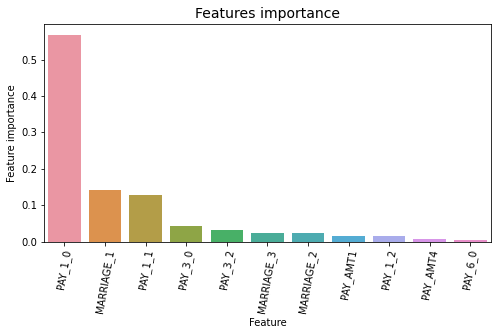

In [41]:
tmp = pd.DataFrame({'Feature': os_X.columns, 'Feature importance': clf_rf_best.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)[:11]
plt.figure(figsize = (8,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=80)
plt.show()  

##### Plot optimal tree and confusion matrix

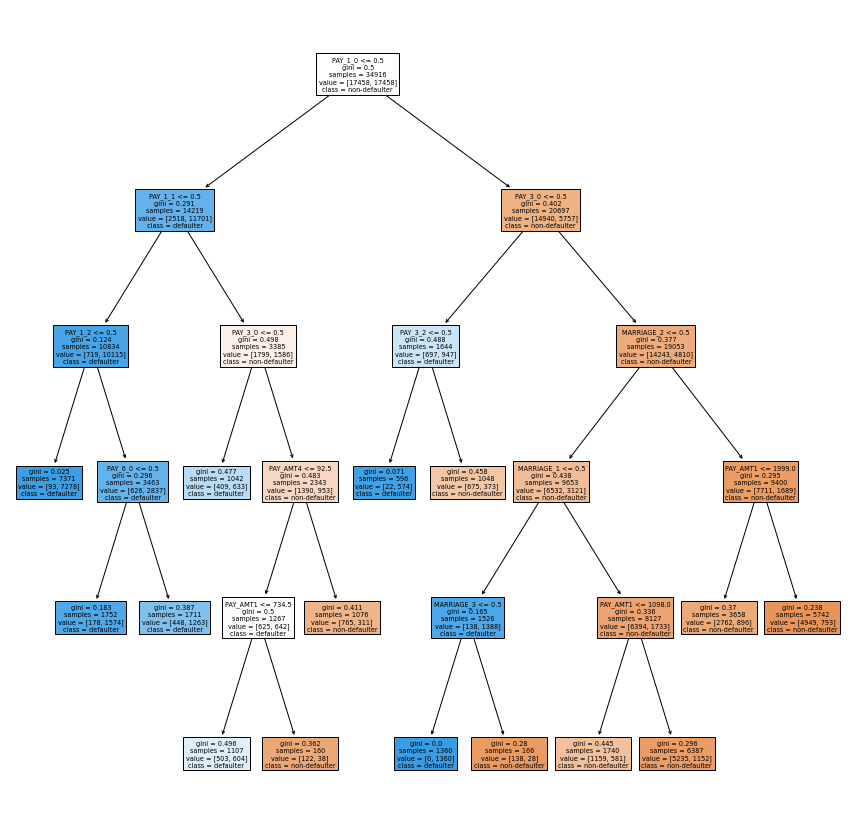

In [42]:
plt.figure(figsize=(15,15))
plot_tree(clf_rf_best, feature_names = os_X.columns,
               class_names=['non-defaulter','defaulter'], filled = True);

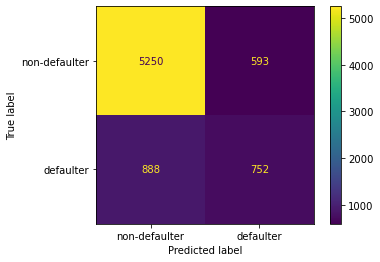

In [43]:
plot_confusion_matrix(clf_rf_best, X_test, y_test, display_labels=['non-defaulter','defaulter']);

#### SVM
- affected by class imbalance
- must normalize data
- KNN does better with smaller datasets. We will still check oversampled data (using SMOTE), but we should expect to get better results by down sampling and/or reducing features

##### Balance classes using SMOTE

In [ ]:
os_X, os_y = SMOTE_os(X_train, y_train, verbose=True)

##### Normalize data

In [ ]:
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(os_X)
X_test_svm = scaler_svm.transform(X_test)

##### Baseline Model

In [ ]:
# 4m
clf_svm = SVC(random_state=1)
clf_svm.fit(os_X, os_y)
print_eval_metrics(os_X, X_test, os_y, y_test, clf_svm)

Because the SVM baseline model took 4 minutes, we will downsample since SVM's handle smaller datasets anyway.

##### Downsample 

In [ ]:
df_downsamp = downsample(df)

##### Downsample split and one-hot encode

In [ ]:
ds_X = df_downsamp.drop('DEFAULT', axis=1).copy()
ds_y = df_downsamp['DEFAULT'].copy()
ds_X_train, ds_X_test, ds_y_train, ds_y_test = train_test_split(one_hot_encode(ds_X), ds_y,
                                                                test_size=0.25, random_state=1)

In [ ]:
scaler_svm2 = StandardScaler()
X_train_svm = scaler_svm2.fit_transform(ds_X_train)
X_test_svm = scaler_svm2.transform(ds_X_test)

In [ ]:
clf_svm2 = SVC(random_state=1)
clf_svm2.fit(ds_X_train, ds_y_train)
print_eval_metrics(ds_X_train, ds_X_test, ds_y_train, ds_y_test, clf_svm2)

In [ ]:
# 
svm_param_grid = [ {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
gs_svm = GridSearchCV(estimator=SVC(random_state=1), param_grid=svm_param_grid,
                        scoring='accuracy', cv=4, verbose=0) 
gs_svm.fit(ds_X_train, ds_y_train)
print(gs_svm.best_score_)
print(gs_svm.best_params_)
# print(gs_knn.cv_results_)

In [ ]:
def svmClassify(X_train, y_train):
    svm_pipe = make_pipeline(StandardScaler(), SVC(probability = True))

    svm_param_grid =[{'C':[0.1,1,10],
            'kernel':['poly', 'rbf', 'sigmoid', 'linear']}]

    gs_SVM = GridSearchCV(estimator=svm_pipe,
                param_grid=svm_param_grid,
                scoring='accuracy',
                cv=4, verbose=0)
    
    gs_knn.fit(X_train, y_train)


    return gs_SVM

#### Logistic Regression
Assumptions:
* Binary logistic regression
    *  a binary dependent variable
    * the factor level 1 of the dependent variable should represent the desired outcome
* Independent variables
    * related to target variable
    * no multicollinearity
    * linearly related to the log odds.
* Better with larger sample sizes.

##### Balance classes using SMOTE

In [ ]:
os_X, os_y = SMOTE_os(X_train, y_train, verbose=True)

##### Normalize data

In [ ]:
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(os_X)
X_test_svm = scaler_svm.transform(X_test)

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [1e-1, 1, 2]
    'solver' : ['liblinear','lbfgs']},
]

# Create grid search object

clf_logreg = GridSearchCV(pipe, param_grid=param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf_logreg.fit(X_train, y_train)

In [ ]:
def LRClassify(X_train, y_train):
    lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

    lr_param_grid =[{'logisticregression__C':[1e-2, 1e-1, 1, 2],
                    'logisticregression__solver':['liblinear','newton-cg', 'lbfgs'],
                    'pca__n_components': np.arange(10,num_feats+1,5)}]

    gs_lr = GridSearchCV(estimator=lr_pipe,
                param_grid=lr_param_grid,
                scoring='accuracy',
                refit=True,
                n_jobs=-1,
                cv=3, verbose=0)
    
    return gs_lr

#### Evaluate Performance

In [ ]:


# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')

In [ ]:
def evaluatePerformance(X_train, X_test,y_train,y_test, gridsearchmodel, classifiername):    

    print(gridsearchmodel.best_params_)

    # y_prob = gridsearchmodel.predict_proba(X_test)
    y_pred = gridsearchmodel.predict(X_test)

    train_score = gridsearchmodel.score(X_train,y_train) # accuracy
    test_score = gridsearchmodel.score(X_test,y_test)
    print(classifiername, "Training Accuracy:", train_score)
    print(classifiername, "Test Accuracy:", test_score)

    return train_score, test_score, y_pred, gridsearchmodel

In [ ]:
import pickle

In [ ]:
def classifyDefault(X_train, X_test, y_train, y_test, classifierName="KNN"):
    #create model using different classifiers
    if classifierName == "DT" :
        gsmodel = dtClassify()
    
    if classifierName == "KNN" :
        gsmodel = knnClassify()
        
    if classifierName == "SVM" :
        gsmodel = svmClassify()
    
    if classifierName == "LogReg" :
        gsmodel = LRClassify()

    #create pickle file of model
    gsmodel.fit(X_train, y_train)
    filename = classifierName + '_classification_model.sav'
    outfile = open(filename,'wb')
    pickle.dump(gsmodel, outfile)
    outfile.close()

    return evaluatePerformance(X_train, X_test,y_train, y_test, gsmodel, classifierName)

## Interpret Results

#### Conclusion

- Insights:
    - Pay history is the most important feature in predicting defaulters, especially recent payment history.
- Optimal Model: XGBoost
    - .88 recall score

#### Next Steps

- Use advanced ML and Deep Learning techniques, like a neural network
- Use advanced dimensionality reduction like PCA and LDA for many of the algorithms
- Explore the data more for insights
- Gather more data
